In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

## Tasks

In [11]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

20
SineNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


0.02874193899333477


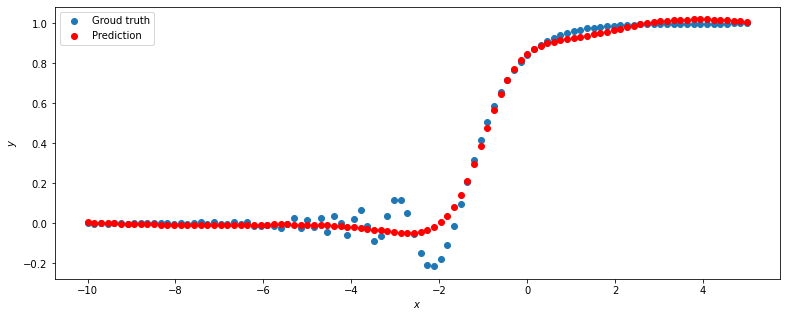

In [45]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

net = RegressionNet(40)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

def loss(pred, target):
    # MAE - Mean Absolute Error
    mae = (pred - target)
    return mae.abs().mean()

for epoch_index in range(1900):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
predict(net, x_validation, y_validation)

## Train Dataset

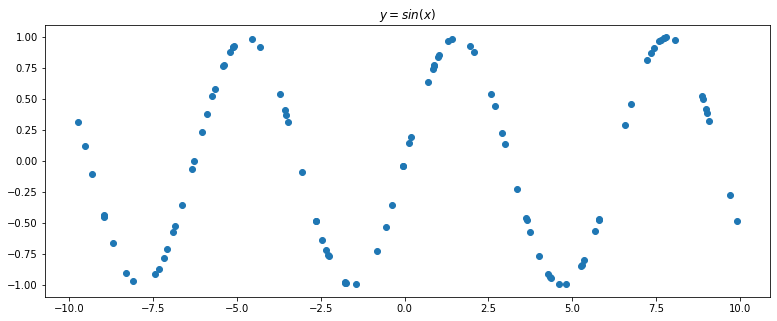

In [2]:
# берем точки из равномерного распределения
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

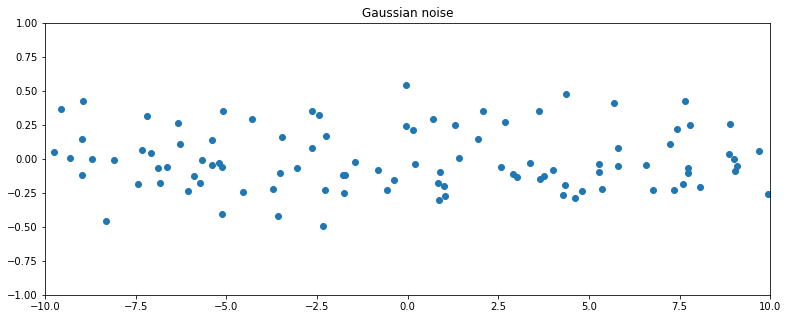

In [3]:
# добавляем шум
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

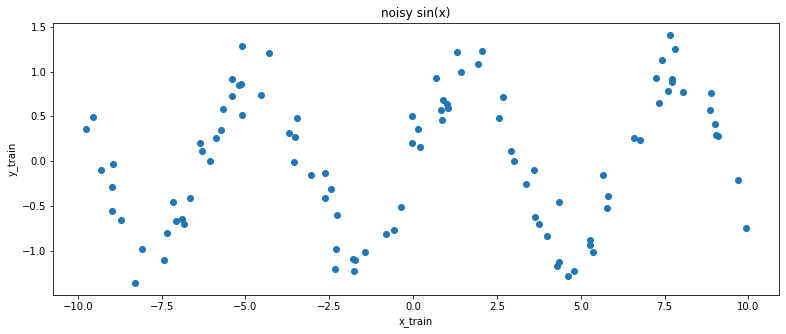

In [4]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [6]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


## Validation Dataset

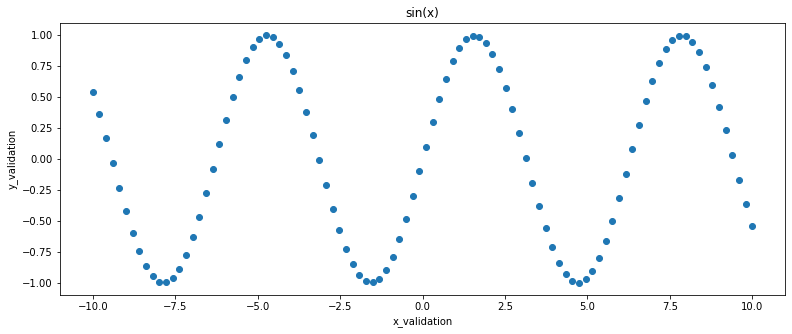

In [7]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [8]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

## Model construction

In [9]:
class SineNet(torch.nn.Module): # данное наследование вносит доп функции
    def __init__(self, n_hidden_neurons): # передаем любые нужные параметры
        super(SineNet, self).__init__() # инициализация родительского объекта
        
#         слои
#        fully connected layer = Linear 
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # (колво входных, колво выходных нейронов)
    
#        функция активации 
        self.act1 = torch.nn.Sigmoid()
    
#        полносвязный слой с 1 выходом - ответом
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

#     ф-я последовательного применения слоев
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

## Prediction

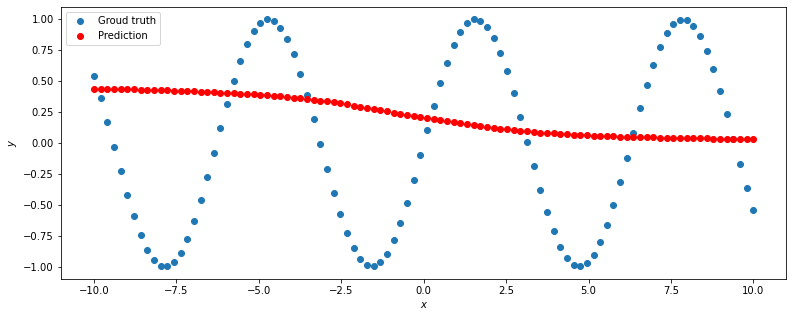

In [10]:
# необученная нейросеть

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [ ]:
# ground truth - то, что мы хотели бы увидеть на валидации, где:
#     x - то, что мы передаем в сеть
#     y - то, что мы бы хотели, чтобы сеть вернула

In [ ]:
# Так как сеть была инциализирована случайными числами, в предикшине мы получили случайную кривую

## Optimizer

In [12]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Adam - type of gradient decsent
# sine_net.parameters() - параметры, которые мы хотим модифицировать: веса

## Loss finction

In [13]:
def loss(pred, target):
    squares = (pred - target) ** 2 # (MSE)
    return squares.mean()

# target - реальное значение, которое соответствует этой точке

## Training procedure

In [ ]:
# Эпоха - польный разовый просмотр датасета

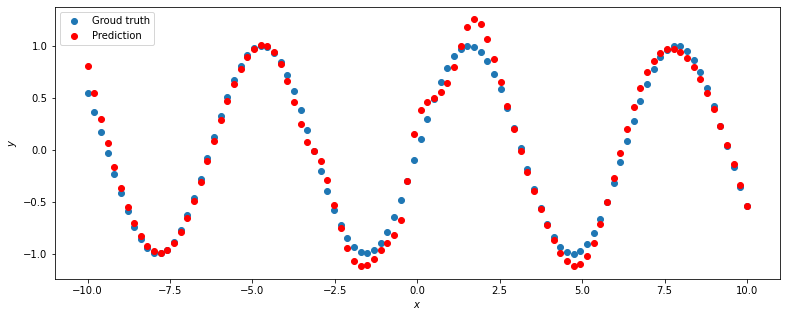

In [14]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
#     результат loss_val - скаляр, по которому можно сделать backward

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)